In [3]:
import pandas as pd
import math


#grabs entropy of given dataset
def Total_Entropy(dataset):
    target_feature = dataset.columns[-1]

    dataset_Entropy = 0

    #goes through possible outputs
    for output in dataset[target_feature].unique(): 
        
        #finds ratio of 1 output to total rows
        target_ratio = dataset[target_feature].value_counts()[output]/len(dataset.index)   
        #calculates entropy
        dataset_Entropy += target_ratio * math.log2(target_ratio)

    return dataset_Entropy * -1

    
    

def Information_Gain(dataset,feature):
    
    #calculates total entropy of dataset
    total_entropy = Total_Entropy(dataset)
    
    weighted_entropy = 0

    
    for output in dataset[feature].unique():
        
        #grabs subset of each value
        subset = dataset[dataset[feature] == output]

        #ratio of subset. Such as sunny days / total days
        subset_ratio = len(subset)/len(dataset)

        #Entropy of certain value within subset
        subset_entropy = Total_Entropy(subset)

        weighted_entropy += subset_ratio * subset_entropy
    
 


    
    info_gain = total_entropy - weighted_entropy
    #returns info gain rounded to 3 digits
    return round(info_gain,3)


def max_info_gain(dataset,features):

    max = -1
    best_feature = None

    #calculates information gain of each column and returns column with best IG
    for feature in features.columns:
        current_info_gain = Information_Gain(dataset,feature)

        if(current_info_gain > max):
            
            max = current_info_gain
            best_feature = feature

    return best_feature



def ID3_helper(features, training_instances):

    #If the training instance only contains 1 majority_label then it is returned
    if training_instances.iloc[:,-1].nunique() == 1: 
        label = training_instances.iloc[0,-1]      
        return label


    #if the list of features is empty, then the majority level is returned
    elif features.empty:
        if not training_instances.empty:
            majority_label = training_instances.iloc[:,-1].value_counts().idxmax()
            return majority_label

    #if training instances are empty we return None, which returns the previous majority_label
    #elif training_instances.empty:
    #    return None
    
    #pruning
    # if training instances are less than or equal to 30 we return majority label
    # if training instances are empty we return 0
    elif len(training_instances) <= 30 or training_instances.empty:
        if not training_instances.empty:
            majority_label = training_instances.iloc[:, -1].value_counts().idxmax()
            return majority_label
        else:
            return None 
    
    else:
        #Grabs feature with max info gain
        MaxIG = max_info_gain(training_instances, features)
        tree = {MaxIG: {}}  
        remaining_features =  features.drop(MaxIG, axis=1)
        
        #loops through all possible values of feature
        for value in data[MaxIG].unique():
            #grabs rows containing 1 of the possible values of feature
            subset = training_instances[training_instances[MaxIG] == value]            
            
            current = ID3_helper(remaining_features, subset) 
            if current is None or current == None:
                majority_label = training_instances.iloc[:,-1].value_counts().idxmax()
                tree[MaxIG][value] = majority_label
            else:
                tree[MaxIG][value] = current
            
 
        return tree  






data = pd.read_csv("assets/census_training.csv")

model = {}
model = ID3_helper(data.iloc[:,:-1], data)


In [5]:
test = pd.read_csv("assets/census_training_test.csv")

correct = 0
incorrect = 0


def predict(query, model):

    #Base case: returns model when we reach prediction
    if not isinstance(model, dict):
        return model
    
    feature = next(iter(model))
    feature_value = query.get(feature)

    
    subtree = model[feature].get(feature_value)

    if subtree is None:
        return None
    
    return predict(query, subtree)
    

for k,row in test.iterrows():
    prediction = predict(row, model)

    if prediction == row.iloc[-1]:
        correct += 1
    else:     
        incorrect += 1


print("Number of testing examples =  ", incorrect +correct)
print("correct_classification_count =  " , correct )
print("incorrect_classification_count = " , incorrect)
print("accuracy = ", correct/(incorrect+correct) * 100)

Number of testing examples =   15028
correct_classification_count =   12284
incorrect_classification_count =  2744
accuracy =  81.74075059888209


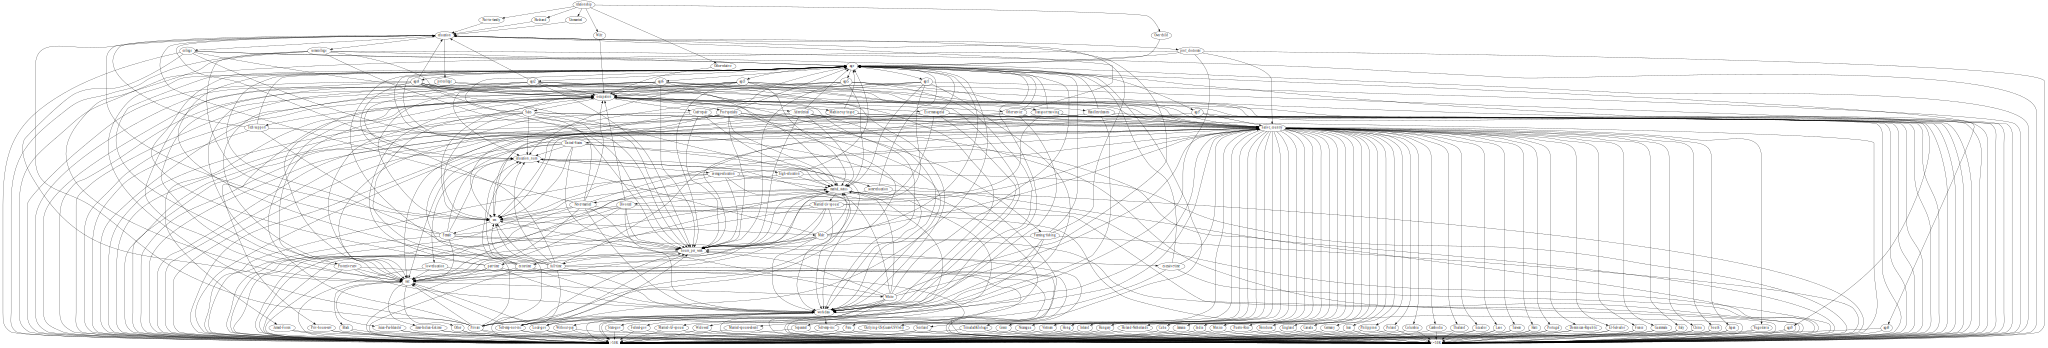

In [21]:
from graphviz import Digraph

def draw_decision_tree_dictionary(tree_dictionary):
    if not isinstance(tree_dictionary, dict):
        raise TypeError("Argument must be of type dictionary")
    if not tree_dictionary:
        raise ValueError("Dictionary tree_dictionary is empty")

    dot = Digraph(strict=True)
    draw_tree(dot, tree_dictionary,None)

    return dot

def draw_tree(dot, tree_dictionary, parent_node_name):
    if isinstance(tree_dictionary, dict):
        for key in tree_dictionary:
            no_spaces_key = str(key).replace(" ","")

            dot.node(no_spaces_key, str(key), shape="ellipse")

            if parent_node_name != None:
                dot.edge(parent_node_name, no_spaces_key)

            draw_tree(dot, tree_dictionary[key], no_spaces_key)

    else:
        val = str(tree_dictionary)
        dot.node(val, val,shape="plaintext")
        dot.edge(parent_node_name, val)

dd = draw_decision_tree_dictionary(model)
dd